In [1]:
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df = pd.read_csv('C:/Users/aktkr/healthcare-projects/bias_detector/.data/allergenchipchallenge-data-corrected-final-hdh-sfa.csv', sep=";", engine="python")
print(f"Shape of the dataframe is: {df.shape}")
print('---')
df.head()

Shape of the dataframe is: (4271, 256)
---


,Patient_ID,Chip_Type,Age,Gender,Blood_Month_sample,French_Residence_Department,French_Region,Rural_or_urban_area,Sensitization,Treatment_of_rhinitis,Treatment_of_athsma,Age_of_onsets,Skin_Symptoms,General_cofactors,Treatment_of_atopic_dematitis,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Hev_b_1,Hev_b_3,Hev_b_5,Hev_b_6.01,Hev_b_8,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Hev_b_6,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_12_RUO,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mes_a_1_RUO,Mor_r,Mus_a,Myt_e,Ole_e_7_RUO,Ori_v,Ory_c_1,Ory_c_2
0,FHB0001,ISAC_V1,21.0,1.0,11.0,deptY,regionB,9,1,9,9,9,9,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0,43",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FHB0002,ISAC_V1,45.0,0.0,12.0,deptY,regionB,9,1,9,9,9,9,0,9,0,0,0,6,"19,32",0,0,0,0,0,0,0,0,0,0,0,0,0,"8,03",0,"4,73","0,86",0,0,0,0,"85,74",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"23,42","34,47",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1,76",0,0,0,0,0,0,0,0,0,0,0,"62,12",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,69",0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FHB0003,ISAC_V1,18.0,1.0,1.0,deptY,regionB,9,0,2,9,0,9,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [4]:
df.describe()

,Age,Gender,Blood_Month_sample,Rural_or_urban_area,Sensitization,Skin_Symptoms
count,4210.000000,4209.000000,4146.000000,4271.000000,4271.000000,4271.000000
mean,23.077435,0.508197,6.385191,6.505736,0.837977,5.419106
std,18.633354,0.499992,3.418881,3.797497,0.368515,4.156195
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,3.000000,1.000000,1.000000,1.000000
50%,16.000000,1.000000,7.000000,9.000000,1.000000,9.000000
75%,35.000000,1.000000,9.000000,9.000000,1.000000,9.000000
max,102.000000,1.000000,12.000000,9.000000,1.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Columns: 256 entries, ﻿Patient_ID to Ory_c_2
dtypes: float64(3), int64(3), object(250)
memory usage: 8.3+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [13]:
print(list(df.columns))

['Patient_ID', 'Chip_Type', 'Age', 'Gender', 'Blood_Month_sample', 'French_Residence_Department', 'French_Region', 'Rural_or_urban_area', 'Sensitization', 'Treatment_of_rhinitis', 'Treatment_of_athsma', 'Age_of_onsets', 'Skin_Symptoms', 'General_cofactors', 'Treatment_of_atopic_dematitis', 'Act_d_1', 'Act_d_2', 'Act_d_5', 'Act_d_8', 'Aln_g_1', 'Alt_a_1', 'Alt_a_6', 'Amb_a_1', 'Ana_o_2', 'Ani_s_1', 'Ani_s_3', 'Api_g_1', 'Api_m_1', 'Api_m_4', 'Ara_h_1', 'Ara_h_2', 'Ara_h_3', 'Ara_h_6', 'Ara_h_8', 'Ara_h_9', 'Art_v_1', 'Art_v_3', 'Asp_f_1', 'Asp_f_3', 'Asp_f_6', 'Ber_e_1', 'Bet_v_1', 'Bet_v_2', 'Bet_v_4', 'Bla_g_1', 'Bla_g_2', 'Bla_g_5', 'Bla_g_7', 'Blo_t_5', 'Bos_d_4', 'Bos_d_5', 'Bos_d_6', 'Bos_d_8', 'Bos_d_Lactoferrin', 'Can_f_1', 'Can_f_2', 'Can_f_3', 'Can_f_5', 'Che_a_1', 'Cla_h_8', 'Cor_a_1.0101', 'Cor_a_1.0401', 'Cor_a_8', 'Cor_a_9', 'Cry_j_1', 'Cup_a_1', 'Cyn_d_1', 'Der_f_1', 'Der_f_2', 'Der_p_1', 'Der_p_10', 'Der_p_2', 'Equ_c_1', 'Equ_c_3', 'Fag_e_2', 'Fel_d_1', 'Fel_d_2', 'Fel_d

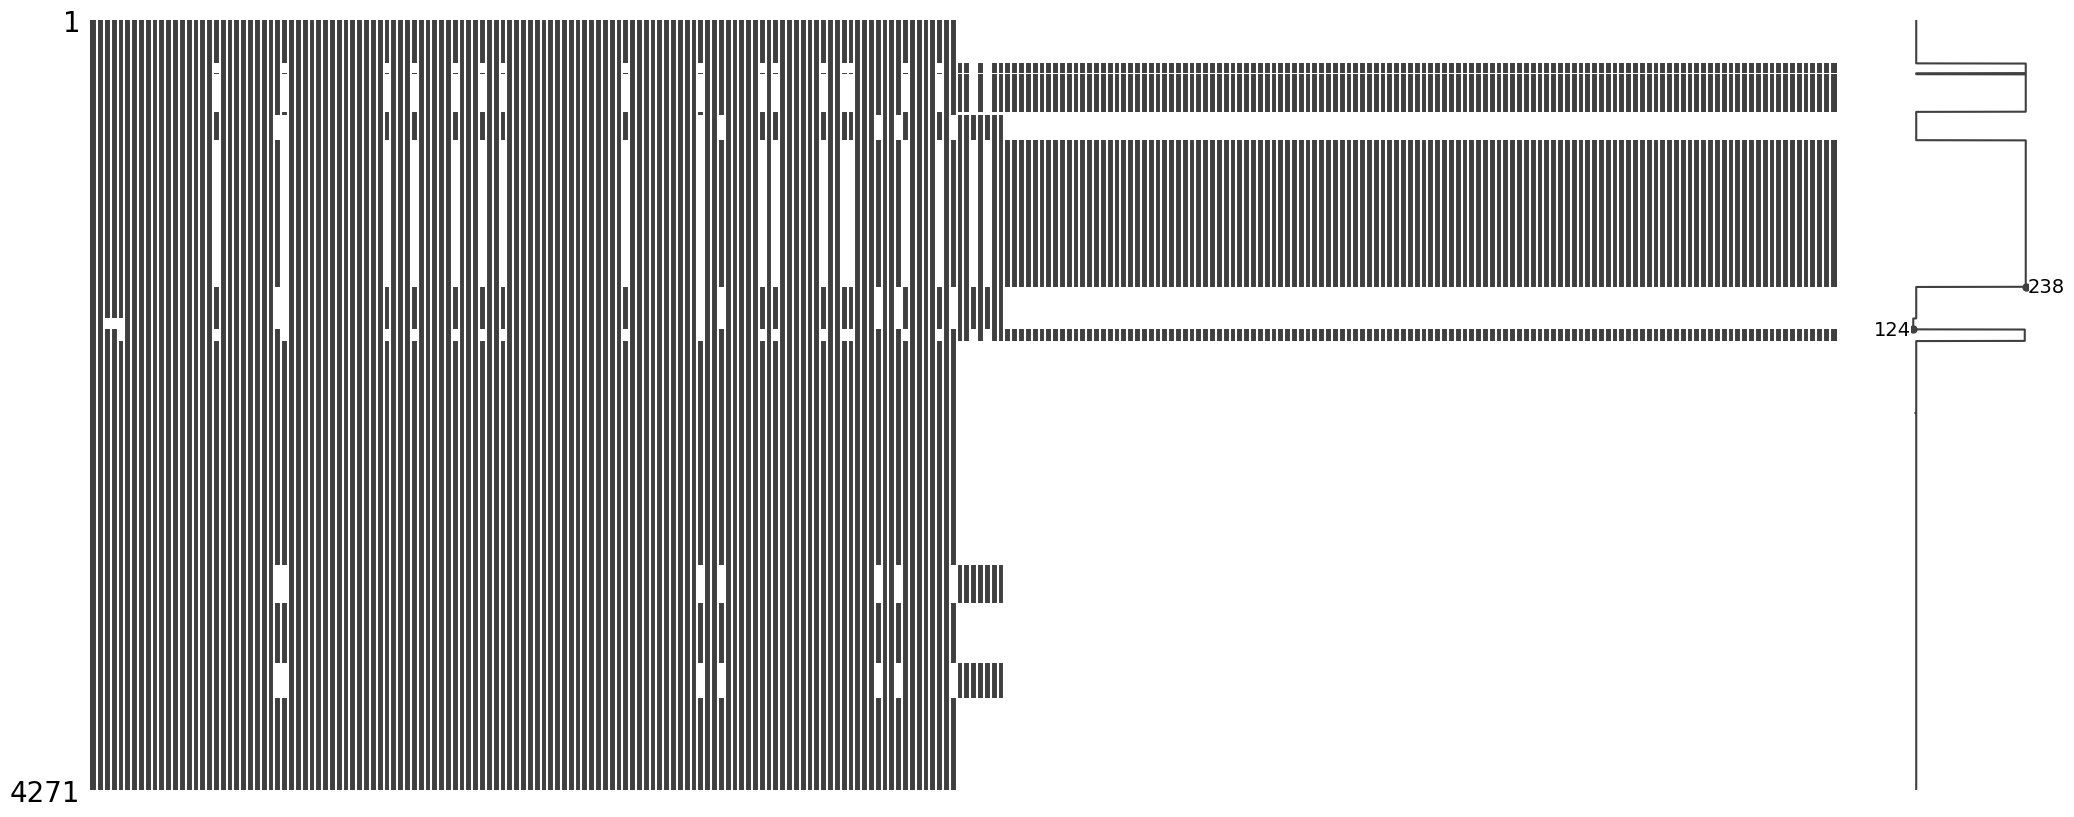

In [7]:
df.columns = [col.lower().replace(" ", "") for col in df.columns]
msno.matrix(df)
plt.show()

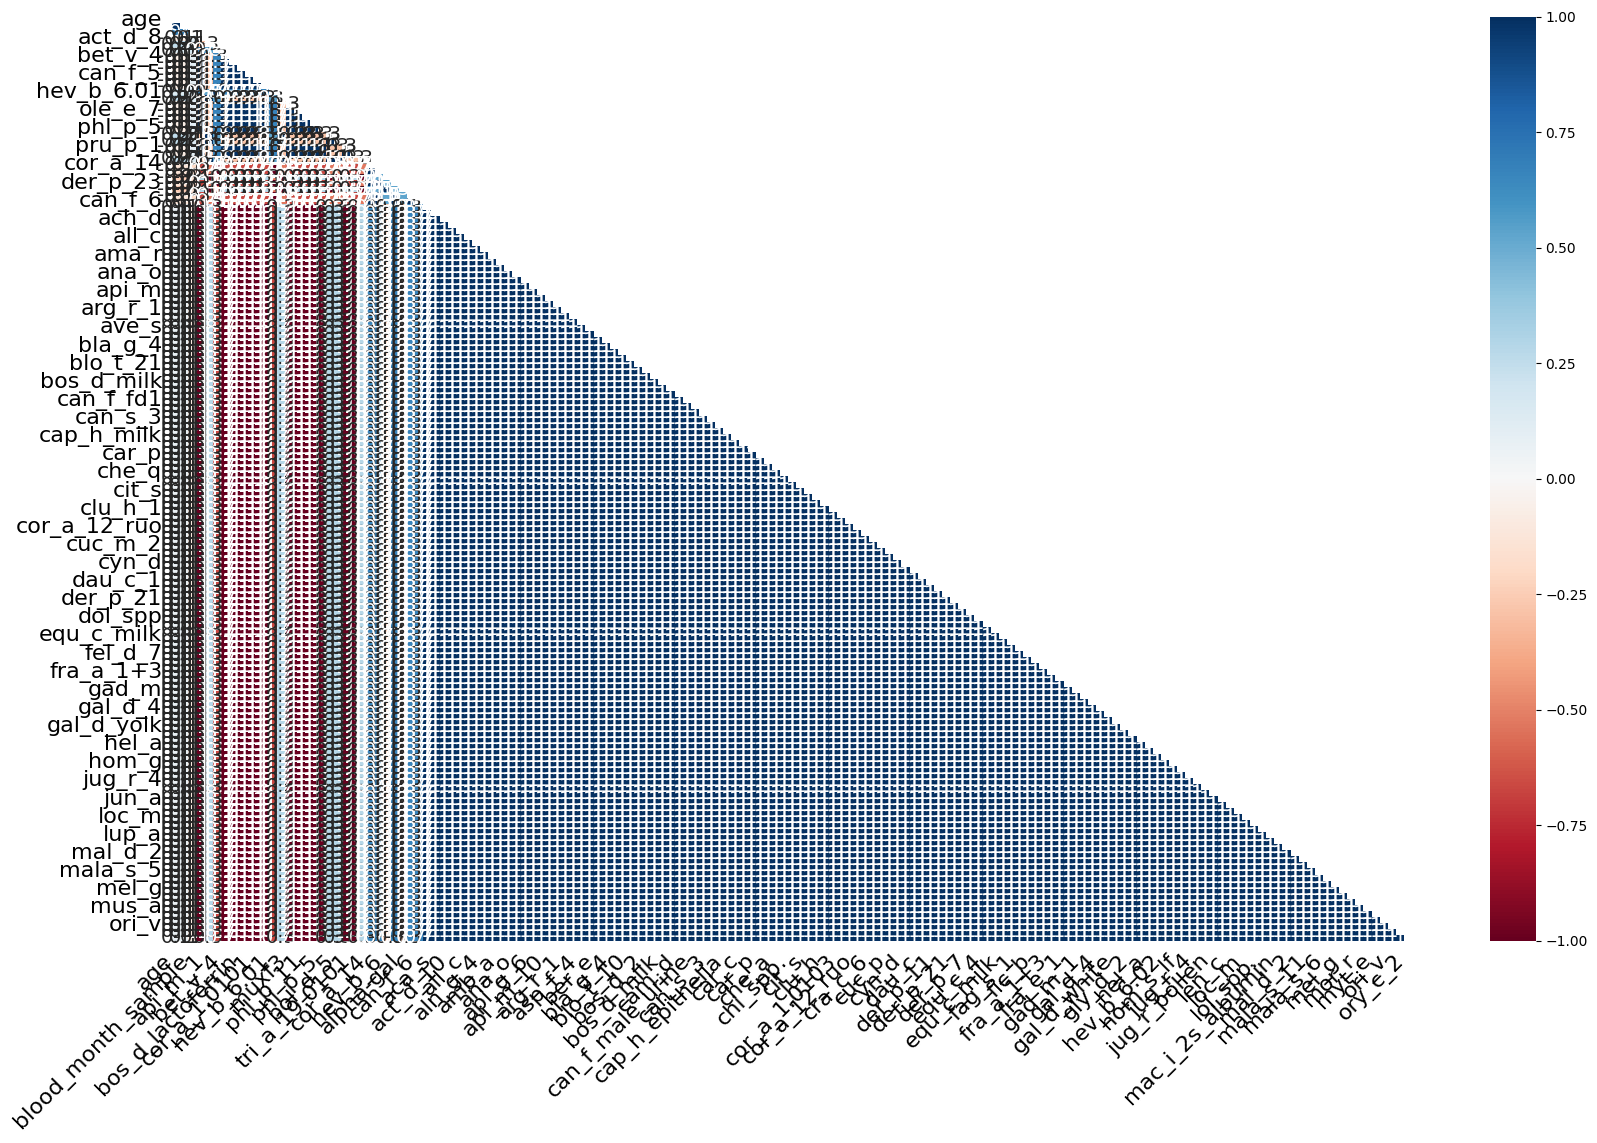

In [8]:
msno.heatmap(df)
plt.show()